In [1]:
from prepare_data import get_data,get_data_SVM
from models import lstm,support_vector_clf
import matplotlib.pyplot as plt
from visualize_data import plot_trend
from score_metrics import plot_confusion,classification_rep
import numpy as np

# importing data

In [2]:
n,new_data,scaler,x_train_open,x_train_close,y_train_open,y_train_close,X_test_open,X_test_close=\
    get_data(name='AAPL',start='2020-01-01', end='2021-06-12')

# Train LSTM on opening and closing data

In [3]:
n_epochs=1
print("Start training on closing prices")
model=lstm((x_train_close.shape[1],1))
model.fit(x_train_close, y_train_close, epochs=n_epochs, batch_size=2, verbose=1)
clo_price = model.predict(X_test_close)
print("Train finished!!\n\n")

print("Start training on opening prices")
model=lstm((x_train_open.shape[1],1))
model.fit(x_train_open, y_train_open, epochs=n_epochs, batch_size=2, verbose=1)
open_price=model.predict(X_test_open)
print("Train finished!!\n\n")

closing_price=scaler.inverse_transform(np.stack((open_price[:,0],clo_price[:,0]),axis=1))[:,0]
opening_price=scaler.inverse_transform(np.stack((open_price[:,0],clo_price[:,0]),axis=1))[:,1]





Start training on closing prices
134/134 [==============================] - 28s 185ms/step - loss: 0.0763
Train finished!!


Start training on opening prices
134/134 [==============================] - 26s 168ms/step - loss: 0.0508
Train finished!!




# Visualizing predictions and metrics

/home/nitishs/Assignments/AML/visualize_data.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred
/home/nitishs/Assignments/AML/visualize_data.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred
/home/nitishs/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        23\n           1       0.38      1.00      0.55        14\n\n    accuracy                           0.38        37\n   macro avg       0.19      0.50      0.27        37\nweighted avg       0.14      0.38      0.21        37\n'

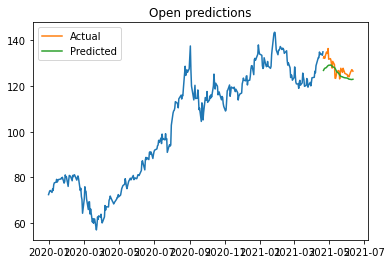

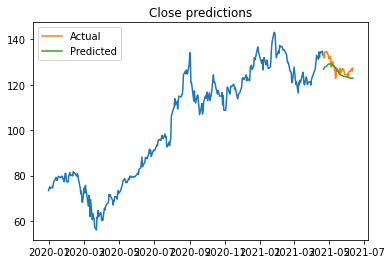

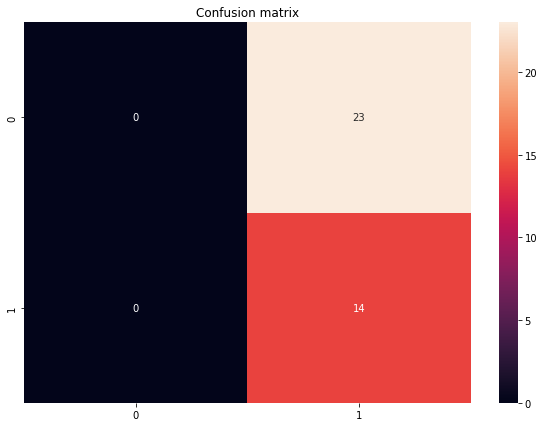

In [4]:
##Visualizing
plot_trend(n,new_data,opening_price,key="Open",save=False)
plot_trend(n,new_data,opening_price,key="Close",save=False)

##Binarizing the predictions
y_pred=((closing_price-opening_price)>0).astype(int)
y_true=((new_data[n:]['Close']-new_data[n:]['Open'])>0).astype(int)

#from sklearn.metrics import confusion_matrix
plot_confusion(y_pred,y_true,save=False)


#classification report
classification_rep(y_pred,y_true)

# SVC classifier

In [5]:
df,X_train,X_test,y_train,y_test=get_data_SVM()

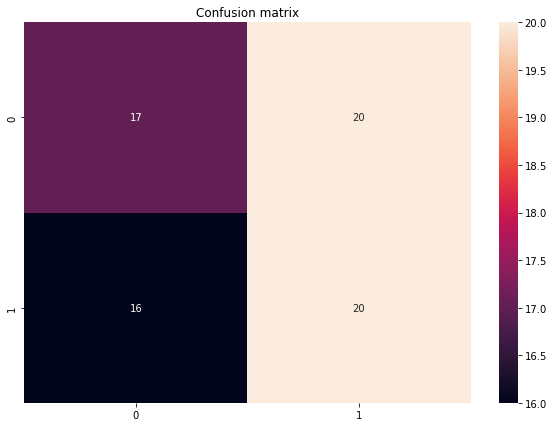

In [6]:
cls=support_vector_clf(X_train,y_train)
y_pred=cls.predict(X_test)
plot_confusion(y_pred,y_test,save=False)

In [7]:
classification_rep(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.52      0.46      0.49        37\n           1       0.50      0.56      0.53        36\n\n    accuracy                           0.51        73\n   macro avg       0.51      0.51      0.51        73\nweighted avg       0.51      0.51      0.51        73\n'

/home/nitishs/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Predicted Returns vs Original Returns')

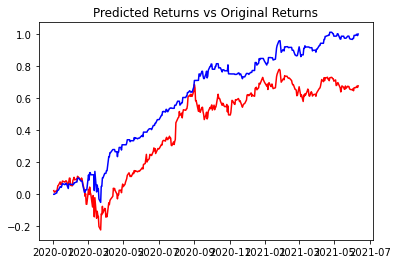

In [8]:
df['Predicted_Signal'] = cls.predict(np.concatenate([X_train,X_test]))
df['Return'] = df.Close.pct_change()
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
df['Cum_Ret'] = df['Return'].cumsum()
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()

import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')
plt.title('Predicted Returns vs Original Returns')